## **Importing Libraries**


In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
from google.colab import files


In [3]:
pd.set_option('display.max_columns', None)

## **Loading Data**

In [4]:
data = pd.read_csv("/content/superstore_data.csv")

In [5]:
data.head()

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


#### Data description is as follows:

* Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise

* ID - Unique ID of each customer

* Year_Birth - Age of the customer

* Complain - 1 if the customer complained in the last 2 years

* Dt_Customer - date of customer's enrollment with the company

* Education - customer's level of education

* Marital - customer's marital status

* Kidhome - number of small children in customer's household

* Teenhome - number of teenagers in customer's household

* Income - customer's yearly household income

* MntFishProducts - the amount spent on fish products in the last 2 years

* MntMeatProducts - the amount spent on meat products in the last 2 years

* MntFruits - the amount spent on fruits products in the last 2 years

* MntSweetProducts - amount spent on sweet products in the last 2 years

* MntWines - the amount spent on wine products in the last 2 years

* MntGoldProds - the amount spent on gold products in the last 2 years

* NumDealsPurchases - number of purchases made with discount

* NumCatalogPurchases - number of purchases made using catalog (buying goods to be shipped through the mail)

* NumStorePurchases - number of purchases made directly in stores

* NumWebPurchases - number of purchases made through the company's website

* NumWebVisitsMonth - number of visits to company's website in the last month

* Recency - number of days since the last purchase








In [6]:
data.shape

(2240, 22)

## **Data Preprocessing**

* The "id" column will be excluded as it is no longer relevant to our analysis.


In [7]:
data.drop(columns='Id', inplace=True)
data.shape

(2240, 21)

In [8]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


* To enrich our analysis, we'll introduce a new column called "Customer_Age" derived from the existing "Year_Birth" column.
* Since the age information will be readily available, we'll subsequently remove the "Year_Birth" column to improve data efficiency.

In [9]:
today_year = datetime.date.today().year
today_year

2024

In [10]:
data["Customer_Age"] = today_year - data["Year_Birth"]

In [11]:
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age
0,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54
1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63
2,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66
3,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57
4,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35


In [12]:
data.drop('Year_Birth', axis=1, inplace=True)

In [13]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age
0,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54
1,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63
2,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66
3,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57
4,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35


In [14]:
data.shape

(2240, 21)

* To enrich our analysis, we'll introduce a new column called "Years_Since_Enrollment" capturing the time elapsed since customer enrollment, based on the information provided in the "Dt_Customer" column.
* As this new column provides the essential details, we'll remove the "Dt_Customer" column to streamline our data.

In [15]:
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])
data["Years_Since_Enrollment"] = today_year - data['Dt_Customer'].dt.year

In [16]:
data.tail()

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Years_Since_Enrollment
2235,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,18,126,47,48,78,2,5,2,11,4,0,0,48,11
2236,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,10,13,3,8,16,1,1,0,3,8,0,0,47,11
2237,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,2,88,15,5,14,2,6,1,5,8,0,0,48,12
2238,Graduation,Married,65819.0,0,0,2012-11-29,99,267,38,701,149,165,63,1,5,4,10,3,0,0,46,12
2239,PhD,Married,94871.0,0,2,2012-01-09,99,169,24,553,188,0,144,1,8,5,4,7,1,0,55,12


In [17]:
data.drop('Dt_Customer', axis=1, inplace=True)

In [18]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Years_Since_Enrollment
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,1,0,54,10
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,1,0,63,10
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,0,0,66,10
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,0,0,57,10
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,1,0,35,10


In [19]:
data.shape

(2240, 21)

* Evaluate the dataset for completeness and consistency by searching for missing entries and identifying any records that appear multiple times.

In [20]:
data.isna().sum()

Education                  0
Marital_Status             0
Income                    24
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
Response                   0
Complain                   0
Customer_Age               0
Years_Since_Enrollment     0
dtype: int64

In [21]:
data[data['Income'].isna()]

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Years_Since_Enrollment
134,PhD,Married,NaN,2,1,4,230,42,192,49,37,53,12,7,2,8,9,0,0,67,12
262,Graduation,Married,NaN,1,0,11,5,5,6,0,2,1,1,1,0,2,7,0,0,41,11
394,PhD,Together,NaN,1,0,17,25,1,13,0,0,3,1,1,0,3,7,0,0,52,10
449,Graduation,Single,NaN,1,0,19,5,1,3,3,263,362,0,27,0,0,1,0,0,38,11
525,PhD,Married,NaN,0,1,23,352,0,27,10,0,15,3,6,1,7,6,0,0,63,11
590,2n Cycle,Married,NaN,1,0,25,25,3,43,17,4,17,3,3,0,3,8,0,0,51,12
899,Master,Together,NaN,0,1,39,187,5,65,26,20,14,2,4,2,6,5,0,0,54,11
997,Graduation,Single,NaN,1,1,45,7,0,8,2,0,1,1,1,0,2,7,0,0,67,10
1096,2n Cycle,Single,NaN,1,1,49,5,1,9,2,0,4,1,1,0,2,7,0,0,60,10
1185,Master,Together,NaN,1,1,52,375,42,48,94,66,96,7,4,10,4,3,0,0,55,11


* Given the presence of 24 missing values concentrated within a single column, we will impute these missing entries using the column's mean value to facilitate further analysis.

In [22]:
data["Income"] = data["Income"].fillna(np.mean(data["Income"]))


In [23]:
data.isnull().sum()

Education                 0
Marital_Status            0
Income                    0
Kidhome                   0
Teenhome                  0
Recency                   0
MntWines                  0
MntFruits                 0
MntMeatProducts           0
MntFishProducts           0
MntSweetProducts          0
MntGoldProds              0
NumDealsPurchases         0
NumWebPurchases           0
NumCatalogPurchases       0
NumStorePurchases         0
NumWebVisitsMonth         0
Response                  0
Complain                  0
Customer_Age              0
Years_Since_Enrollment    0
dtype: int64

In [24]:
data.duplicated().sum()

182


* Duplicate rows can introduce issues within data analysis. Therefore, we will remove them to ensure we have a clean and consistent dataset, ultimately yielding more reliable results.

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data.duplicated().sum()

0

In [27]:
data.shape

(2058, 21)

* With the successful completion of data cleaning activities, including addressing missing values and duplicates, the data is now ready for in-depth analysis.


In [28]:
data.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Years_Since_Enrollment
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,52356.502445,0.445578,0.509232,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,0.152089,0.009718,55.212828,10.968416
std,25377.605248,0.537556,0.546489,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907,0.359195,0.098124,11.973898,0.685621
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,10.000000
25%,35701.750000,0.000000,0.000000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,47.000000,10.000000
50%,52054.000000,0.000000,0.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,54.000000,11.000000
75%,68242.500000,1.000000,1.000000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,65.000000,11.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,131.000000,12.000000


* Further analysis reveals that the 'Response' and 'Complain' columns contain binary categorical data. Since they lack inherent numerical value, it is advisable to convert them to string format for improved data representation and clarity.


In [29]:
data['Response']= data['Response'].astype('str')
data['Response'] = data['Response'].replace(['1'], 'Accept')
data['Response'] = data['Response'].replace(['0'], 'Refuse')

In [30]:
data.tail()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Years_Since_Enrollment
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,Refuse,0,48,11
2236,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,Refuse,0,47,11
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,Refuse,0,48,12
2238,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,Refuse,0,46,12
2239,PhD,Married,94871.0,0,2,99,169,24,553,188,0,144,1,8,5,4,7,Accept,0,55,12


In [31]:
data['Complain']= data['Complain'].astype('str')
data['Complain'] = data['Complain'].replace(['1'], 'Yes')
data['Complain'] = data['Complain'].replace(['0'], 'No')

In [32]:
data.tail(10)

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Years_Since_Enrollment
2228,Graduation,Married,42231.0,1,1,99,24,0,8,0,1,4,1,1,0,3,5,Refuse,No,55,10
2229,2n Cycle,Married,20130.0,0,0,99,0,6,3,7,6,12,1,1,0,3,8,Refuse,No,50,10
2231,Graduation,Widow,42429.0,0,1,99,55,0,6,2,0,4,2,1,1,3,5,Refuse,No,51,10
2233,2n Cycle,Divorced,36640.0,1,0,99,15,6,8,7,4,25,1,2,1,2,5,Refuse,Yes,124,11
2234,Graduation,Divorced,78901.0,0,1,99,321,11,309,33,26,34,3,9,3,5,4,Refuse,No,51,11
2235,PhD,Divorced,66476.0,0,1,99,372,18,126,47,48,78,2,5,2,11,4,Refuse,No,48,11
2236,2n Cycle,Married,31056.0,1,0,99,5,10,13,3,8,16,1,1,0,3,8,Refuse,No,47,11
2237,Graduation,Divorced,46310.0,1,0,99,185,2,88,15,5,14,2,6,1,5,8,Refuse,No,48,12
2238,Graduation,Married,65819.0,0,0,99,267,38,701,149,165,63,1,5,4,10,3,Refuse,No,46,12
2239,PhD,Married,94871.0,0,2,99,169,24,553,188,0,144,1,8,5,4,7,Accept,No,55,12


In [33]:
data["Kidhome"].value_counts()


0    1184
1     831
2      43
Name: Kidhome, dtype: int64

In [34]:
data["Teenhome"].value_counts()

0    1060
1     948
2      50
Name: Teenhome, dtype: int64

* It has been observed that the 'Kidhome', 'Years_Since_Enrollment' and 'Teenhome' columns, although numerical, represent underlying categories. To improve data interpretability and enable more effective analysis, these columns should be converted to string format.

In [51]:
data['Kidhome']= data['Kidhome'].astype('str')
data['Teenhome']= data['Teenhome'].astype('str')
data["Years_Since_Enrollment"] = data["Years_Since_Enrollment"].astype('str')

In [52]:
data.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Customer_Age,Years_Since_Enrollment
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,189,218,1,4,4,6,1,Accept,No,54,10
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,0,37,1,7,3,7,5,Accept,No,63,10
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,2,30,1,3,2,5,2,Refuse,No,66,10
3,Graduation,Married,32474.0,1,1,0,10,0,1,0,0,0,1,1,0,2,7,Refuse,No,57,10
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,0,34,2,3,1,2,7,Accept,No,35,10


In [53]:
data.dtypes

Education                  object
Marital_Status             object
Income                    float64
Kidhome                    object
Teenhome                   object
Recency                     int64
MntWines                    int64
MntFruits                   int64
MntMeatProducts             int64
MntFishProducts             int64
MntSweetProducts            int64
MntGoldProds                int64
NumDealsPurchases           int64
NumWebPurchases             int64
NumCatalogPurchases         int64
NumStorePurchases           int64
NumWebVisitsMonth           int64
Response                   object
Complain                   object
Customer_Age                int64
Years_Since_Enrollment     object
dtype: object

In [54]:
data.describe()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_Age
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,52356.502445,48.951895,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178,2.339164,4.098639,2.660836,5.770651,5.319728,55.212828
std,25377.605248,28.999189,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598,1.942947,2.797577,2.933824,3.239113,2.439907,11.973898
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000
25%,35701.750000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,47.000000
50%,52054.000000,49.000000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,54.000000
75%,68242.500000,74.000000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,65.000000
max,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,131.000000


## **Exploratory Data Analysis**

#### Univariate Analysis


In [55]:
categorical_cols, numerical_cols = [], []
for col in data.columns:
    if data[col].dtypes == "object":
        categorical_cols.append(col)
    else:
        numerical_cols.append(col)

In [56]:
categorical_cols

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'Response',
 'Complain',
 'Years_Since_Enrollment']

In [57]:
numerical_cols

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'Customer_Age']

In [58]:
for col in categorical_cols:
    print(data[col].value_counts())

Graduation    1030
PhD            450
Master         341
2n Cycle       188
Basic           49
Name: Education, dtype: int64
Married     1316
Single       455
Divorced     216
Widow         71
Name: Marital_Status, dtype: int64
0    1184
1     831
2      43
Name: Kidhome, dtype: int64
0    1060
1     948
2      50
Name: Teenhome, dtype: int64
Refuse    1745
Accept     313
Name: Response, dtype: int64
No     2038
Yes      20
Name: Complain, dtype: int64
11    1089
10     517
12     452
Name: Years_Since_Enrollment, dtype: int64


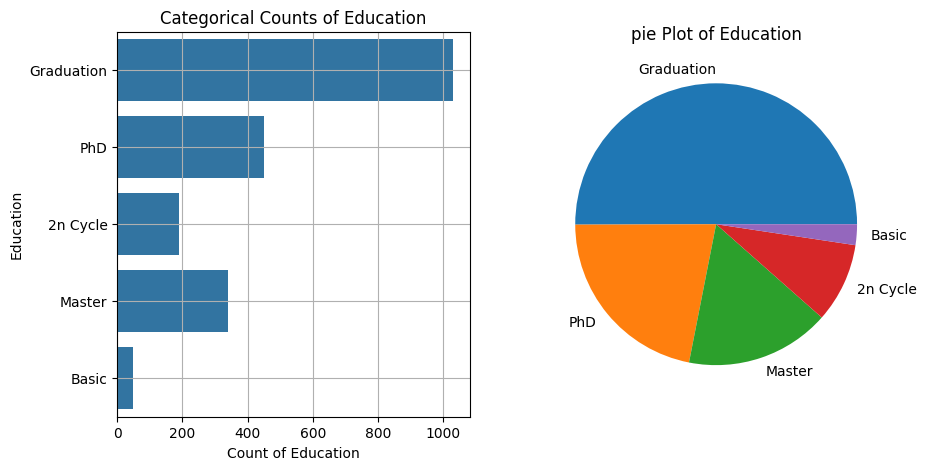

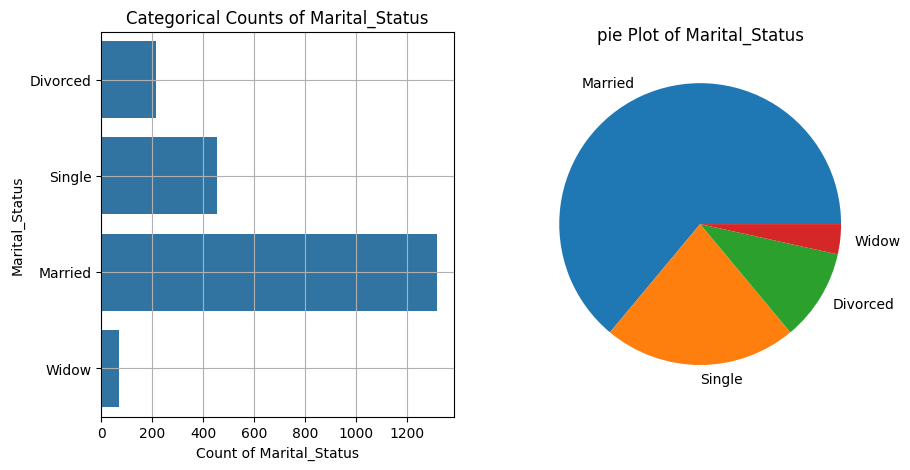

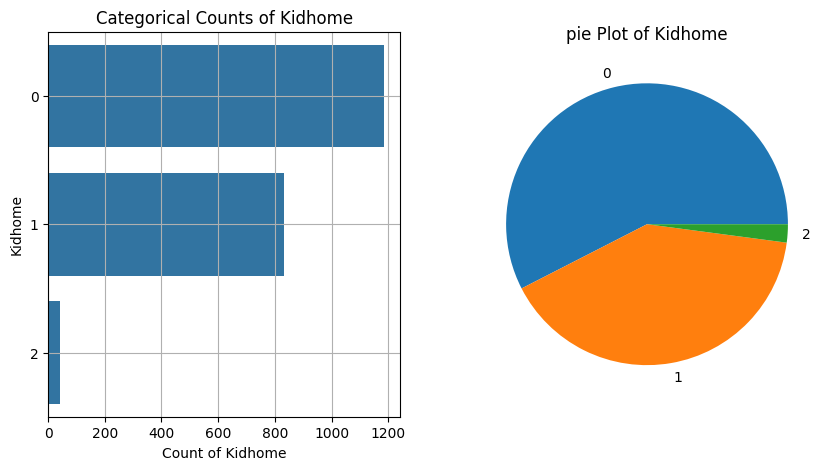

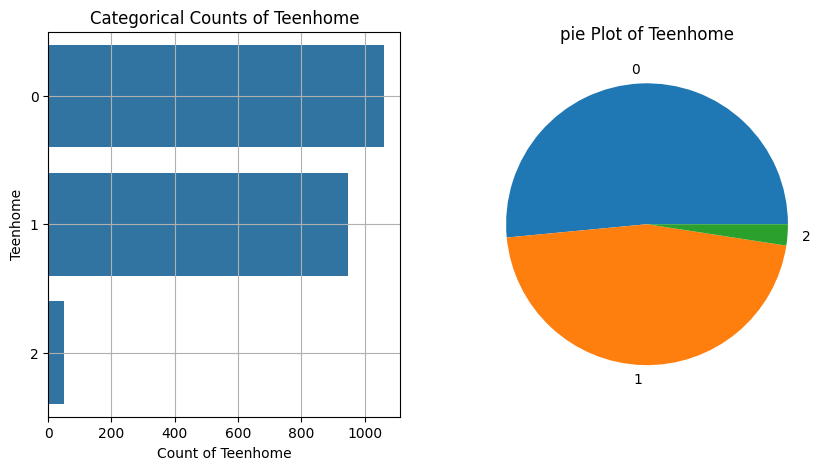

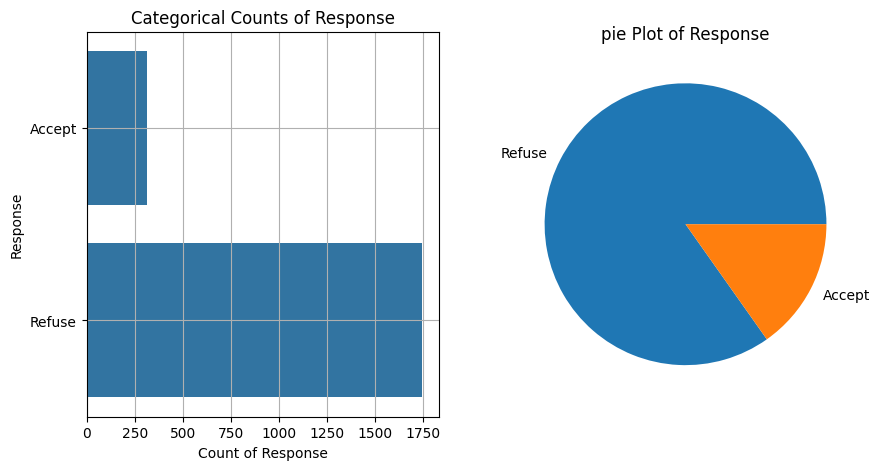

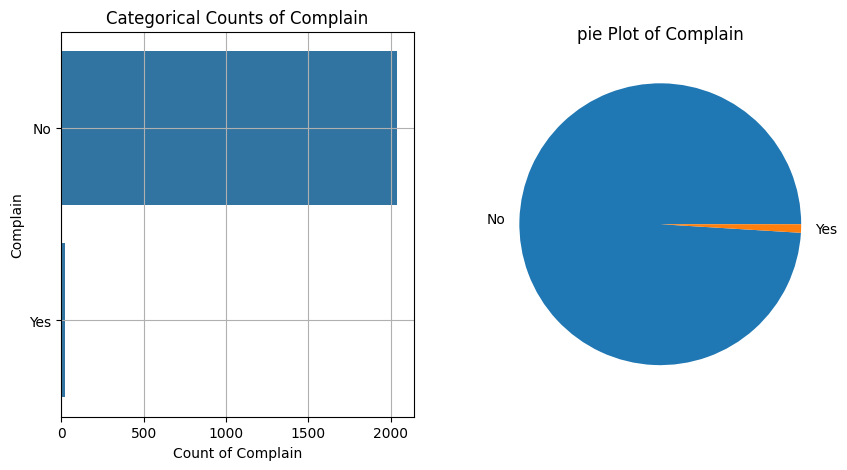

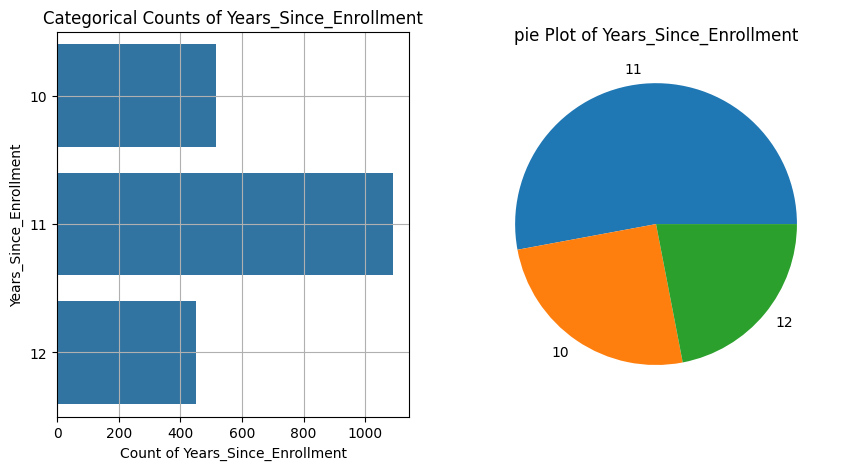

In [59]:
for col in categorical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Categorical Counts of {}".format(col))
    sns.countplot(data = data, y = col)
    plt.xlabel("Count of {}".format(col))
    plt.ylabel(col)
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("pie Plot of {}".format(col))
    mylabels = data[col].value_counts().index
    plt.pie(data[col].value_counts(), labels = mylabels)
    plt.grid()
    plt.show()

**Observations:**

* The predominant educational level among individuals is "Graduation".

* "Married" is the most common marital status within the population.

* Further evaluation of the terms 'yolo', 'alone', and 'absurd' reveals their limited applicability within the scope of this data analysis. Assigning them the category 'single' presents itself as a potential solution.

* The majority of customer responses were negative (refusals).

* There was a very low occurrence of customer complaints reported over the past two years.

* The majority of individuals have no children or teenagers in their household.
* Majority of cusotmers has enrolled with company for 11 years.

In [60]:
data['Marital_Status'] = data['Marital_Status'].replace(['YOLO', 'Alone','Absurd'], 'Single')
data['Marital_Status'] = data['Marital_Status'].replace(['Together'], 'Married')

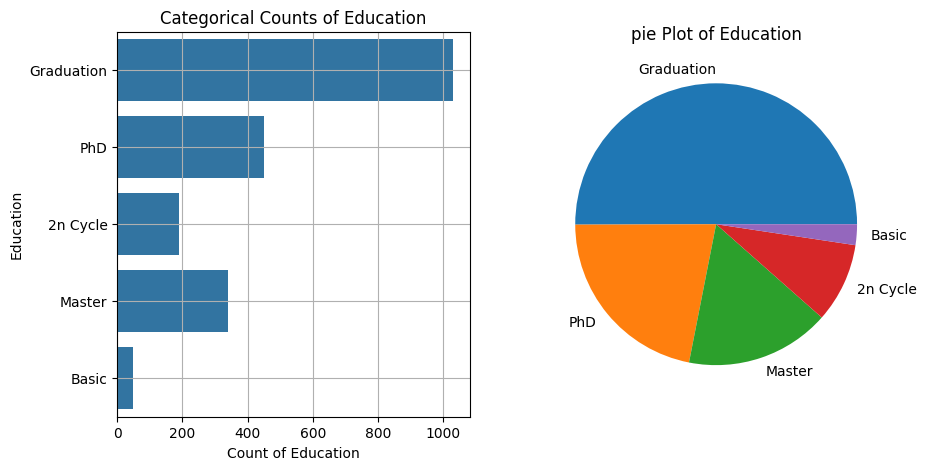

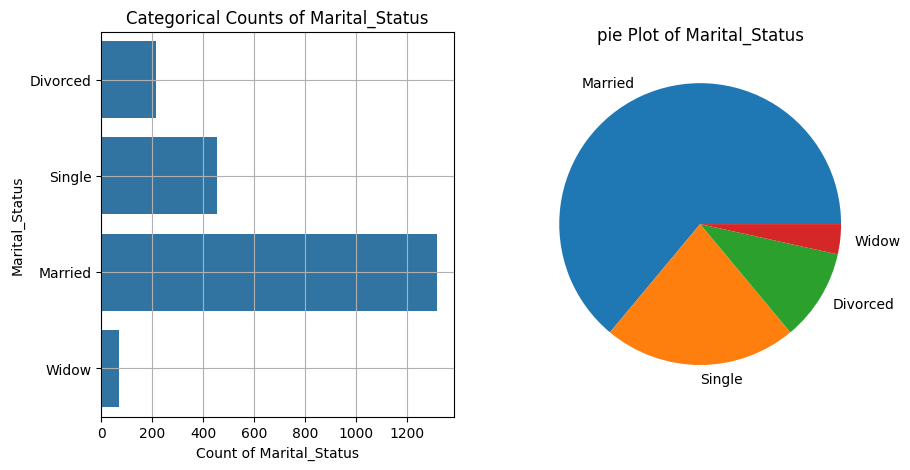

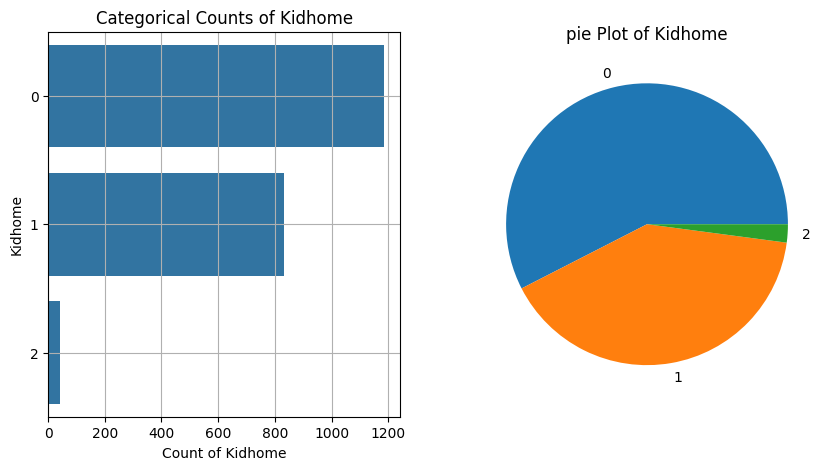

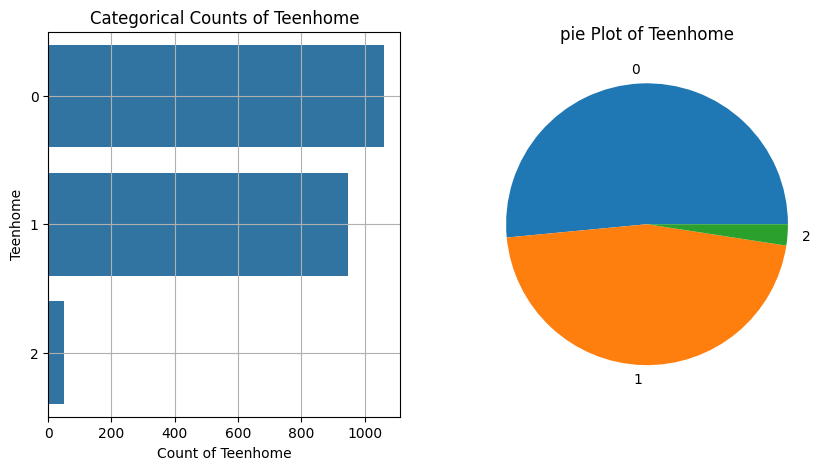

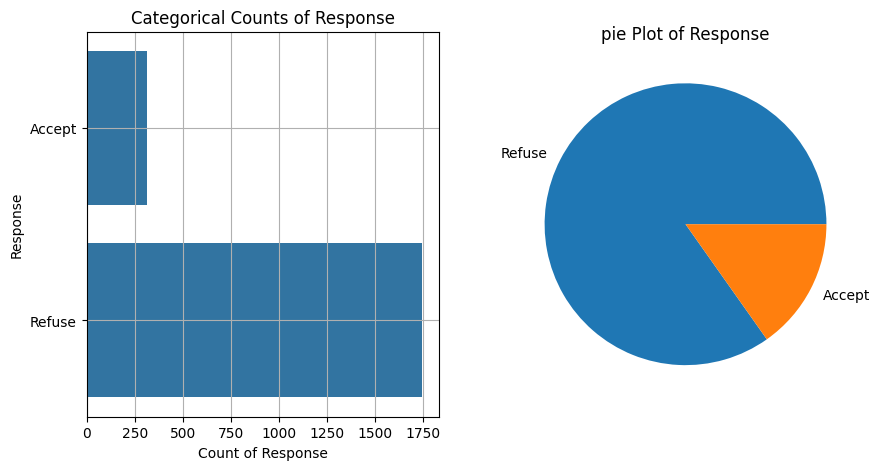

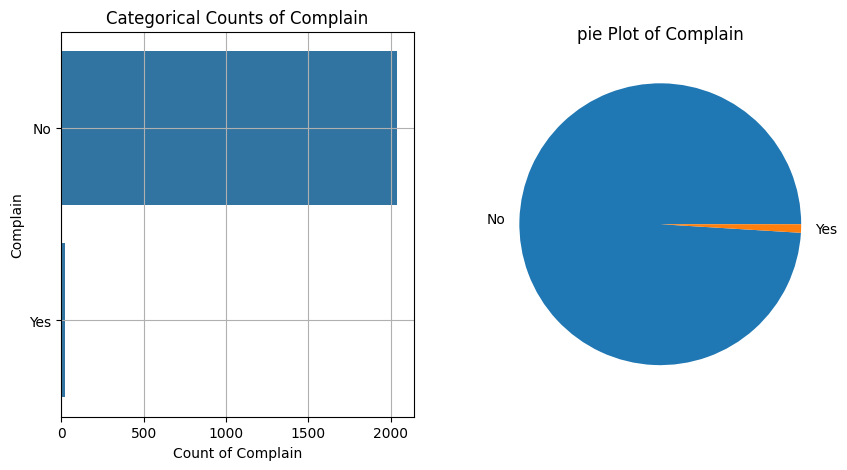

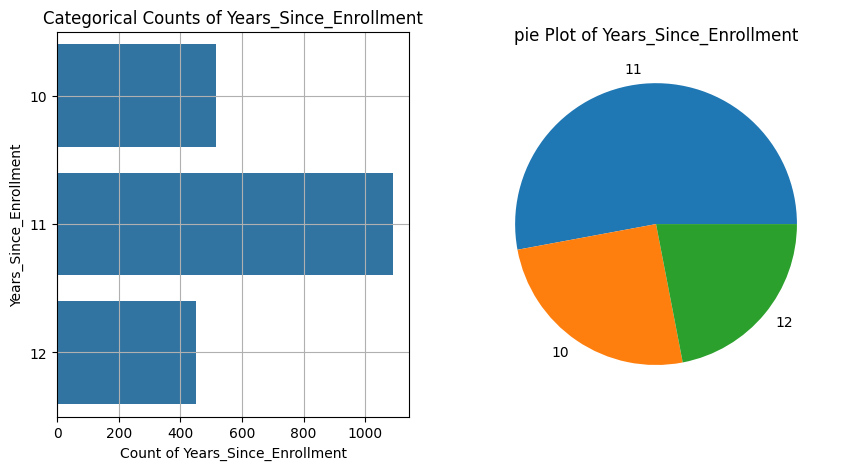

In [61]:
for col in categorical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Categorical Counts of {}".format(col))
    sns.countplot(data = data, y = col)
    plt.xlabel("Count of {}".format(col))
    plt.ylabel(col)
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("pie Plot of {}".format(col))
    mylabels = data[col].value_counts().index
    plt.pie(data[col].value_counts(), labels = mylabels)
    plt.grid()
    plt.show()

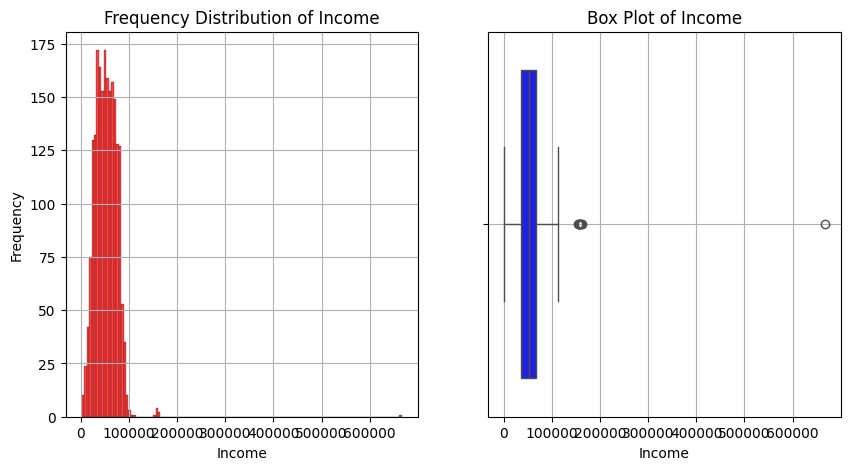

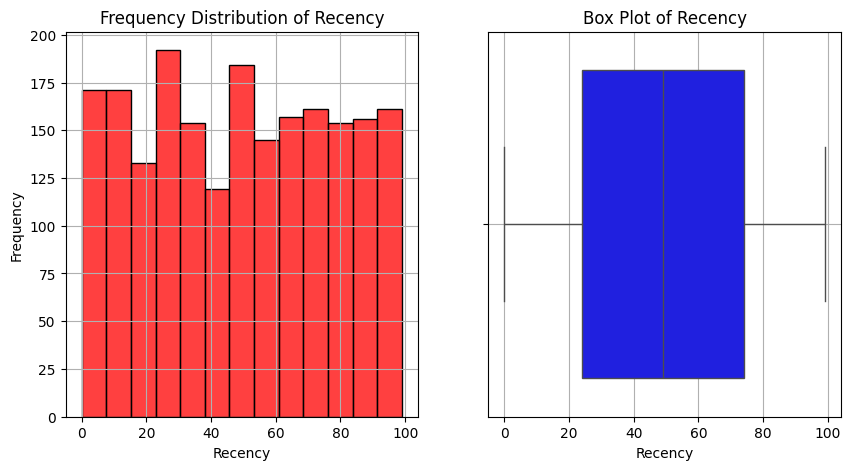

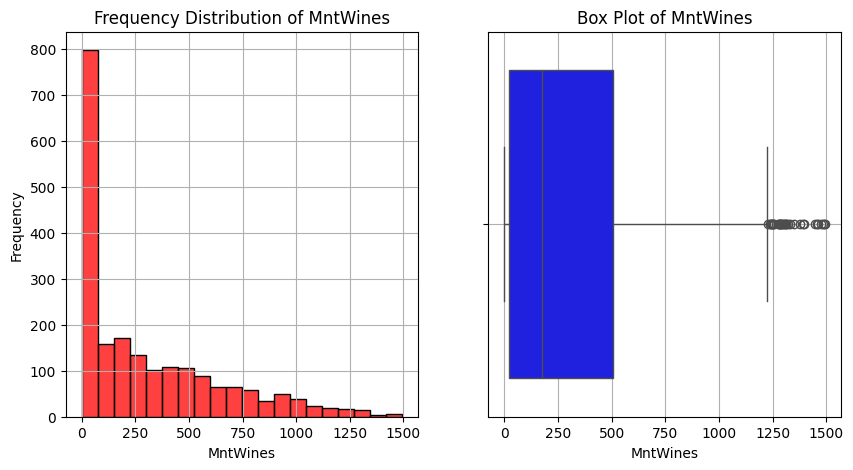

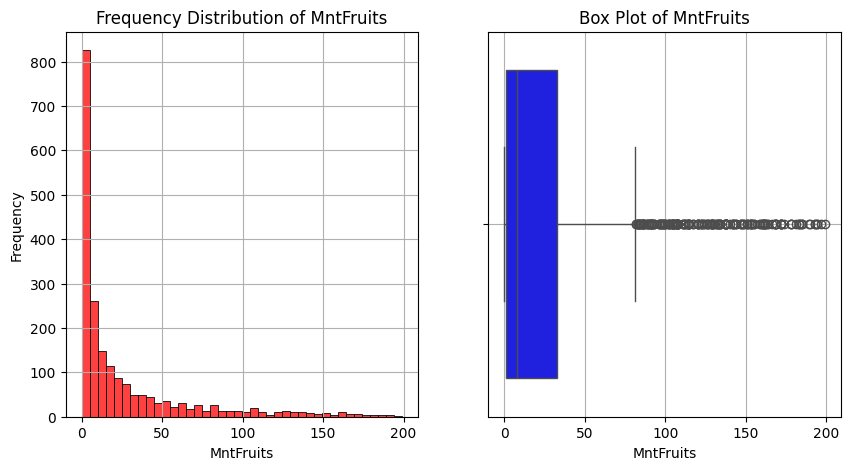

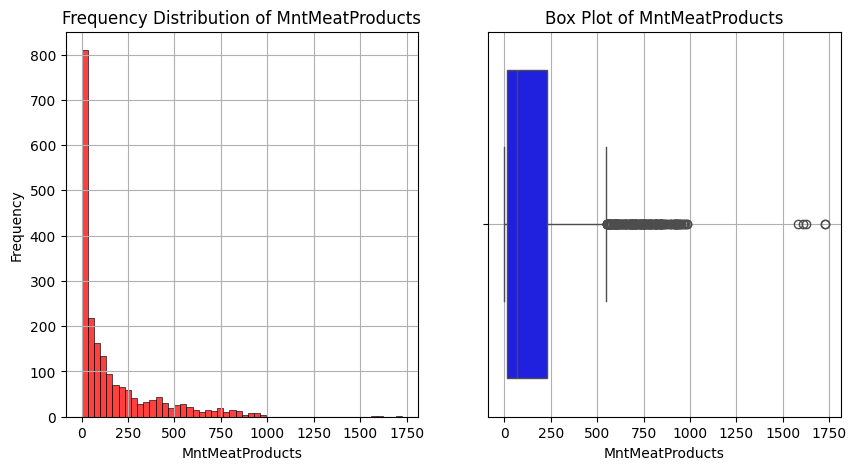

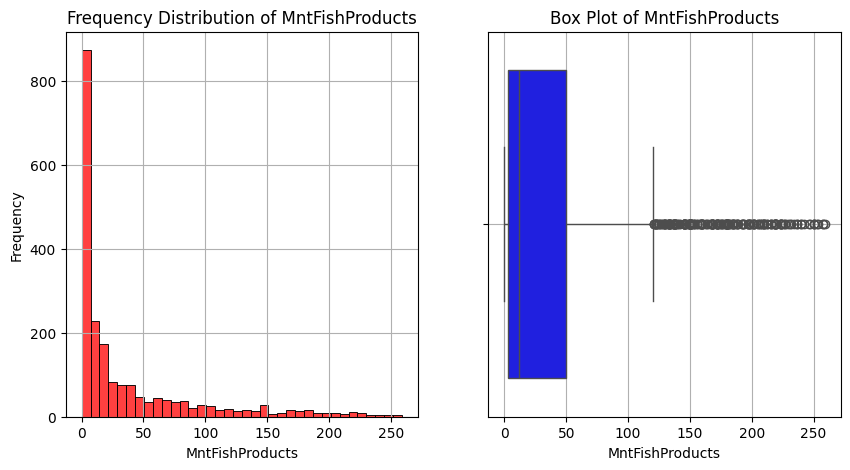

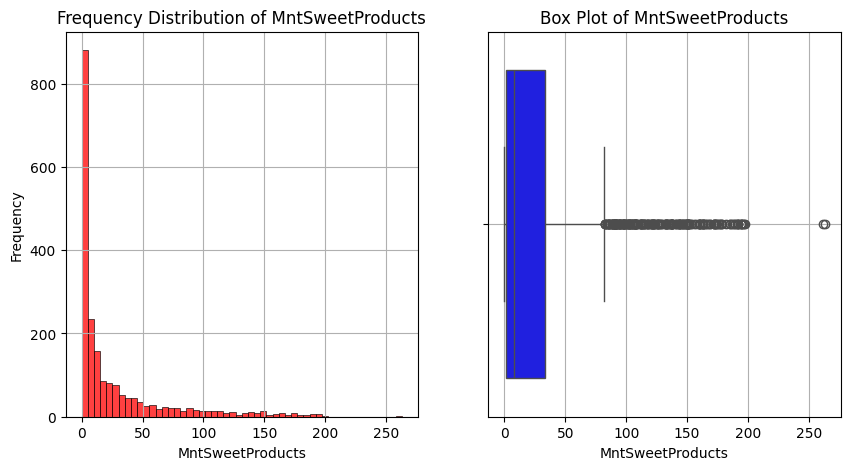

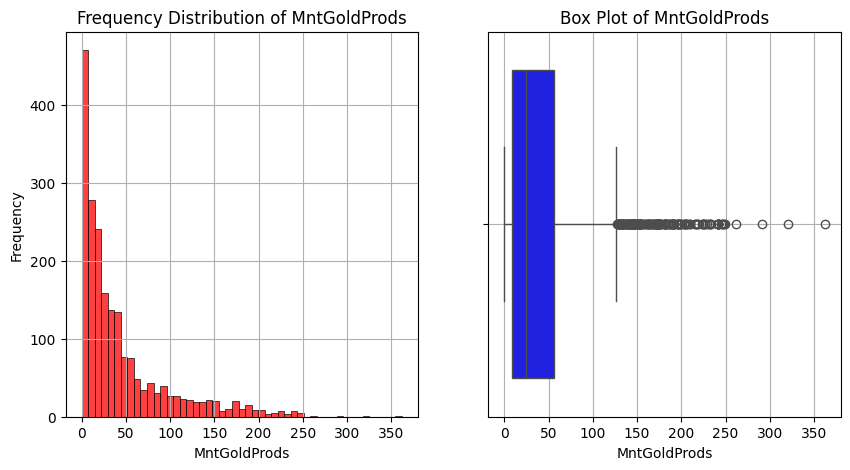

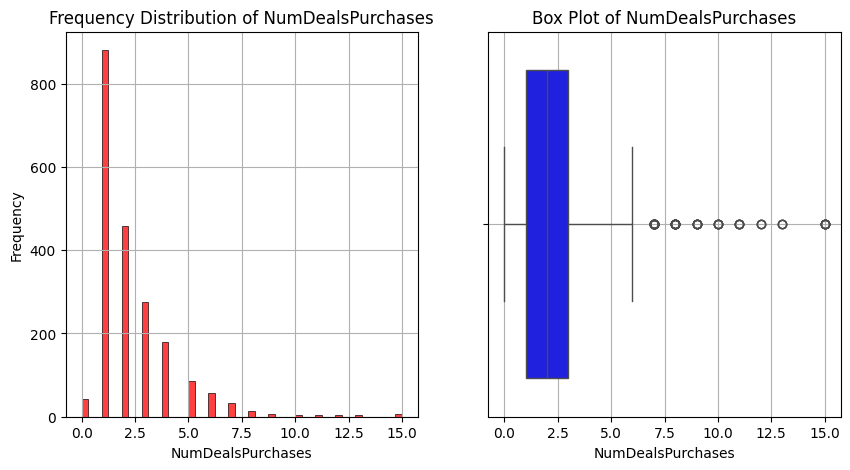

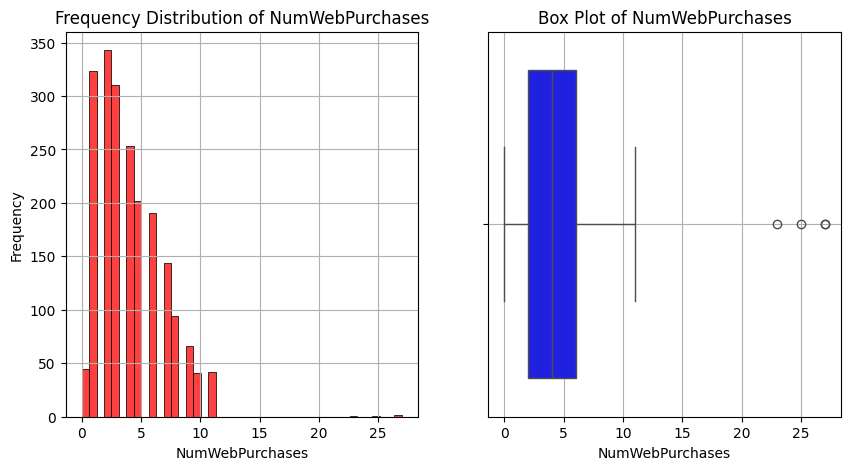

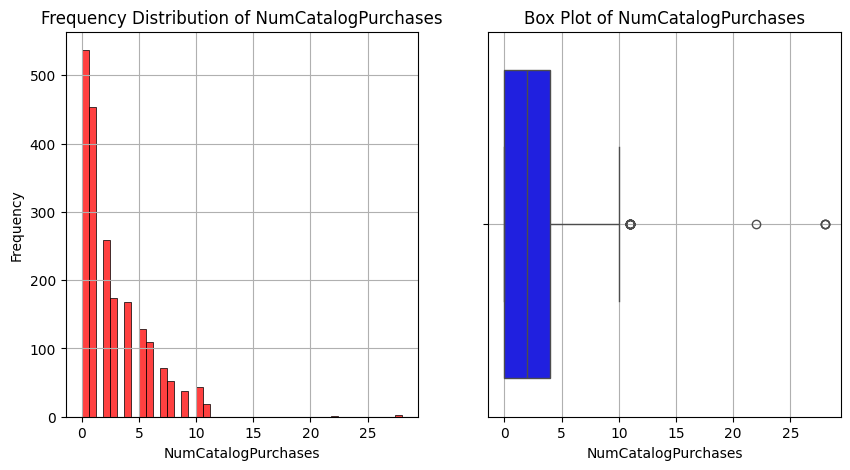

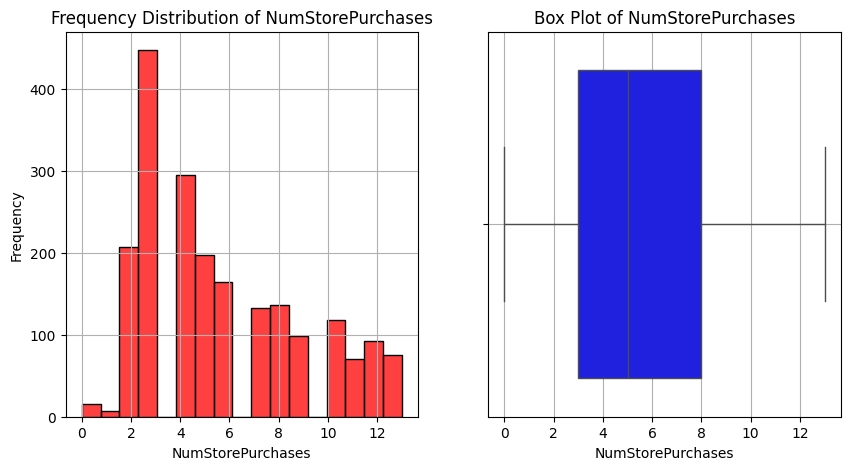

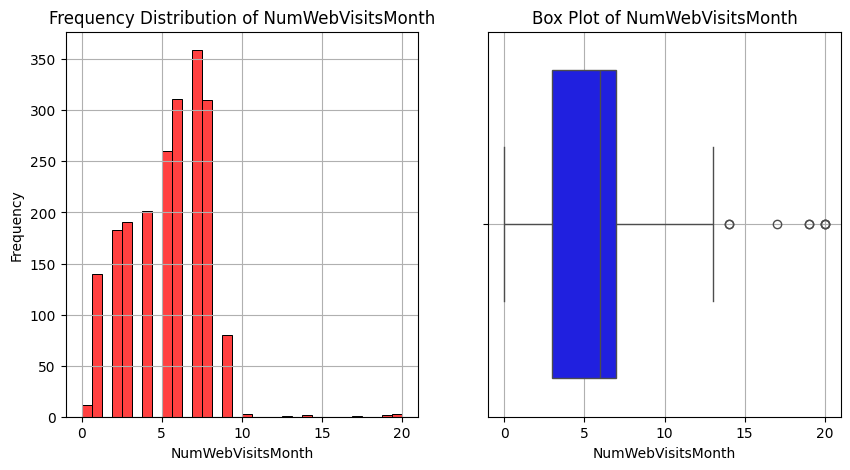

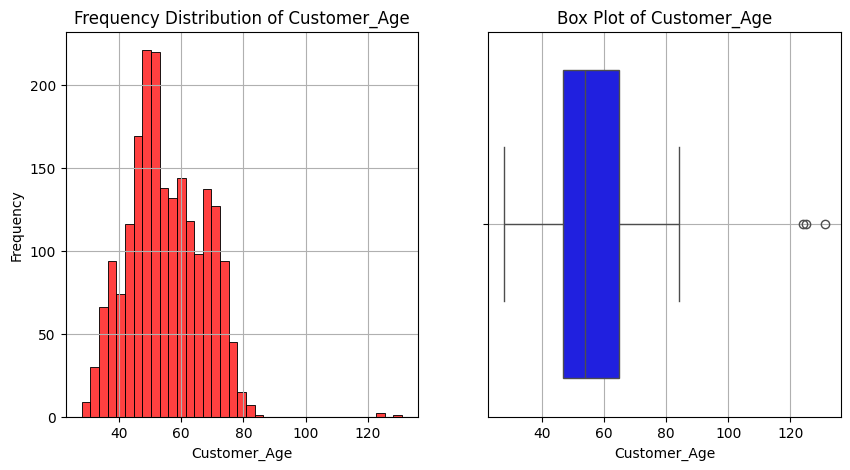

In [65]:
for col in numerical_cols:
    plt.figure(figsize = [10,5])
    plt.subplot(1, 2, 1)
    plt.title("Frequency Distribution of {}".format(col))
    sns.histplot(data = data, x = col, color = "red", cbar = True)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.title("Box Plot of {}".format(col))
    sns.boxplot(data = data, x = col, color = "blue")
    plt.grid()
    plt.show()


*   The majority of columns exhibit a right skew, signifying that the data points cluster towards the lower values with a longer tail extending towards higher values.
*   While some columns display a normal distribution, characterized by a symmetrical bell curve, they still contain outliers. These outliers are data points that fall significantly outside the typical range of the distribution.



#### Multivariate analysis

* The main focus of this multivariate analysis lies in exploring the relationship between each independent variable and the response variables, examining how the independent variables vary with respect to the response variables.

* To analyze how different types of variables influence the response variable, we can categorize the features in the data into meaningful groups, such as "customer details," "customer interaction," and "product amount."



In [70]:
customer_details = ['Education','Marital_Status','Kidhome','Teenhome','Complain',"Years_Since_Enrollment"]
customer_interaction = ['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth']
product_amount = ['MntFruits','MntMeatProducts','MntFishProducts','MntGoldProds','MntSweetProducts','MntWines']

1. Exploration of the relationship between the response variable and customer demographic characteristics.


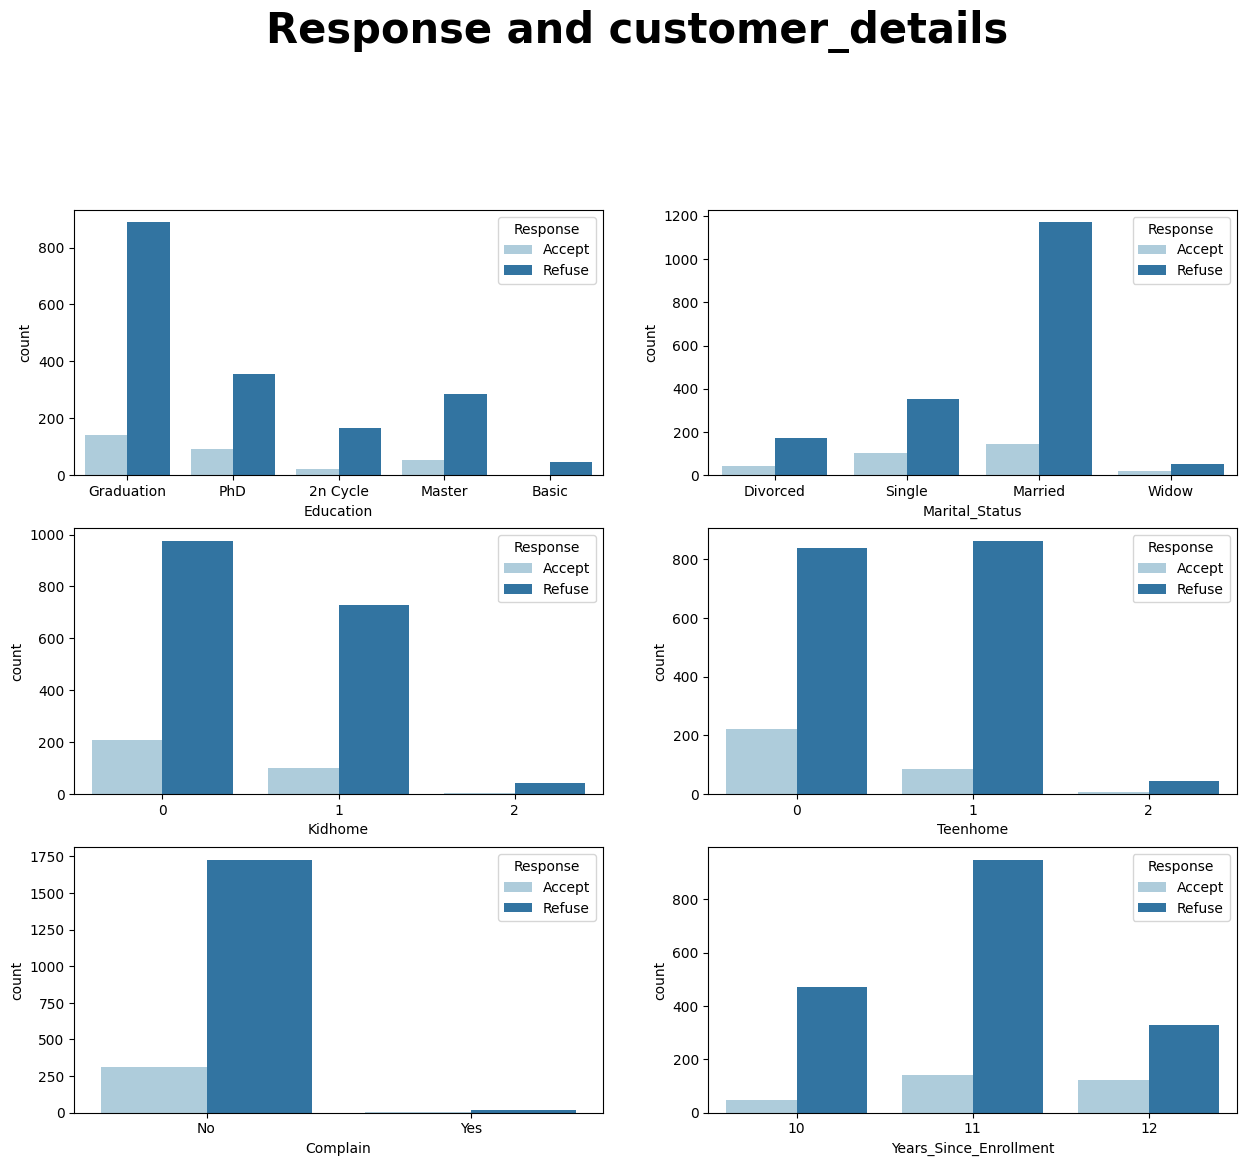

In [72]:
plt.figure(figsize = (15, 20))
plt.suptitle("Response and customer_details",fontweight="bold", fontsize=30)
for i in range(len(customer_details)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = customer_details[i], hue = 'Response', palette = 'Paired', data = data)

2. Analysis of the relationship between the response variable and customer engagement methods.

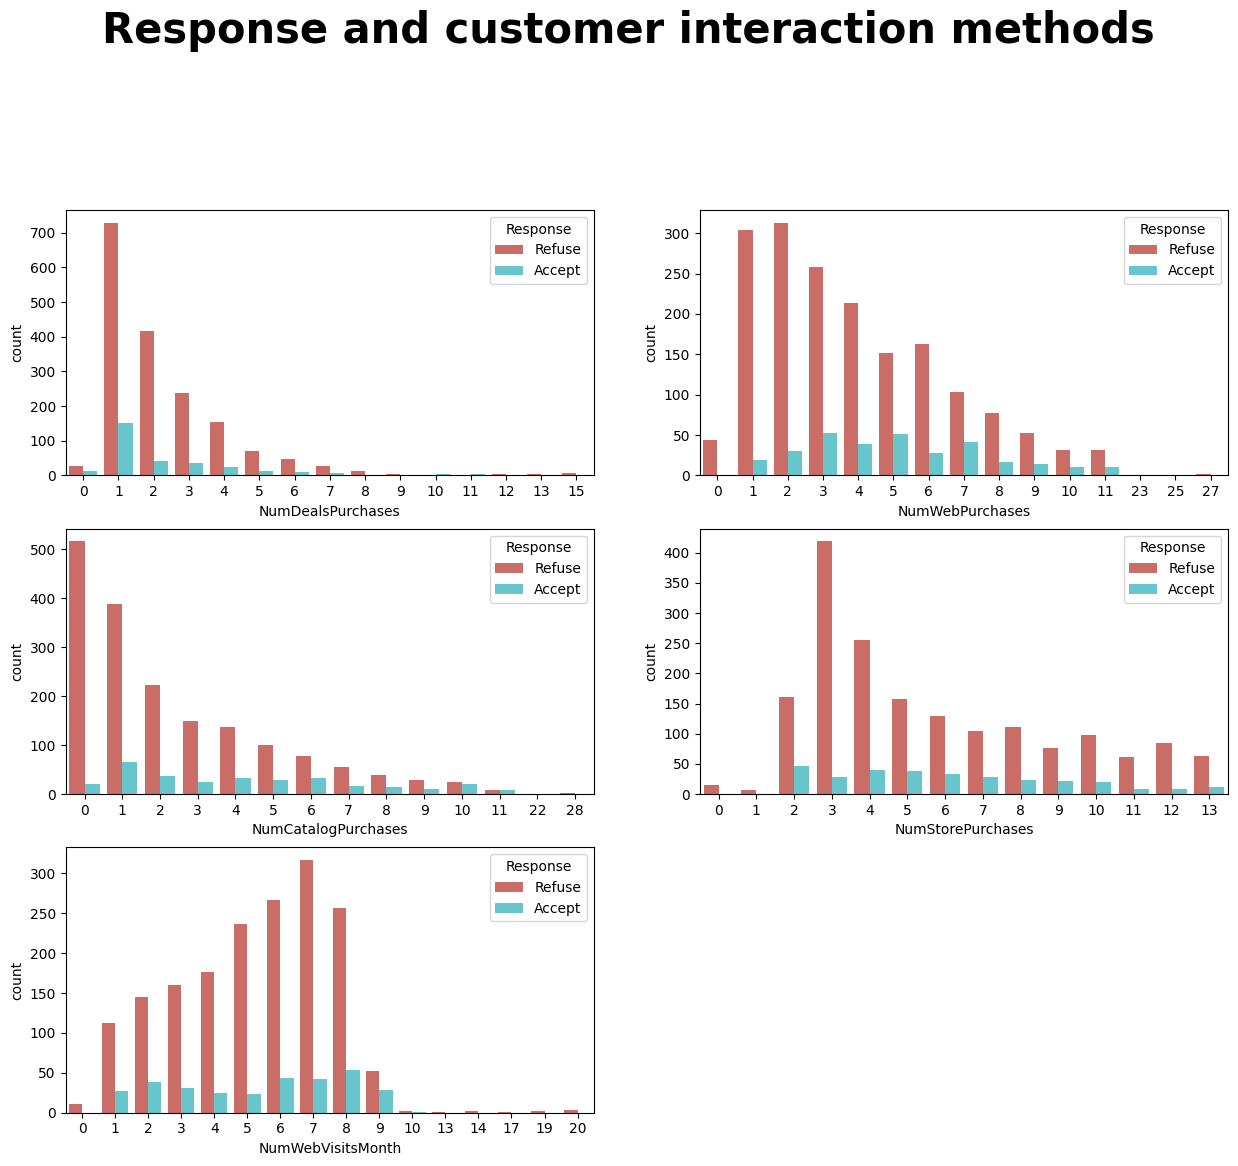

In [74]:
plt.figure(figsize = (15, 20))
plt.suptitle("Response and customer interaction methods",fontweight="bold", fontsize=30)
for i in range(len(customer_interaction)):
    plt.subplot(5,2,i+1)
    sns.countplot(x = customer_interaction[i], hue = 'Response', palette = 'hls', data = data)

3. Analysis of the interaction between the response variable and spending patterns across different product categories.

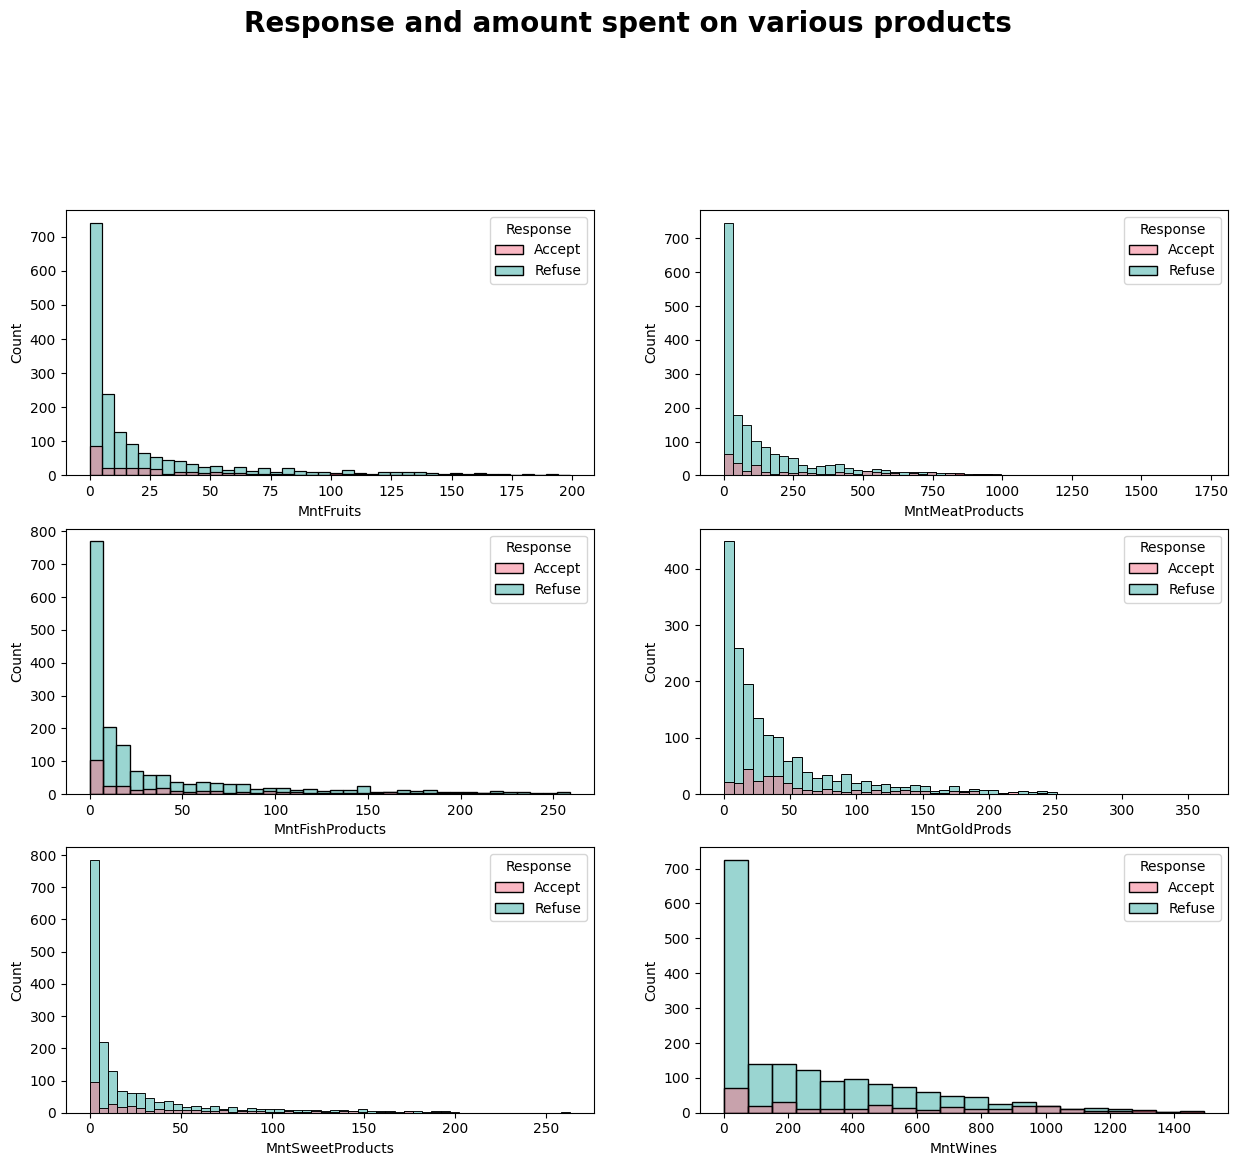

In [81]:
plt.figure(figsize = (15, 20))
plt.suptitle("Response and amount spent on various products",fontweight="bold", fontsize=20)
for i in range(len(product_amount)):
    plt.subplot(5,2,i+1)
    sns.histplot(x = product_amount[i], hue = 'Response' ,  palette = 'husl', data = data)


* The following features weren't categorized into any of the previously mentioned groups ("customer details," "customer interaction," and "product amount"). Therefore, their relationships with the response variable are explored as shown below.

<Axes: xlabel='Recency', ylabel='Count'>

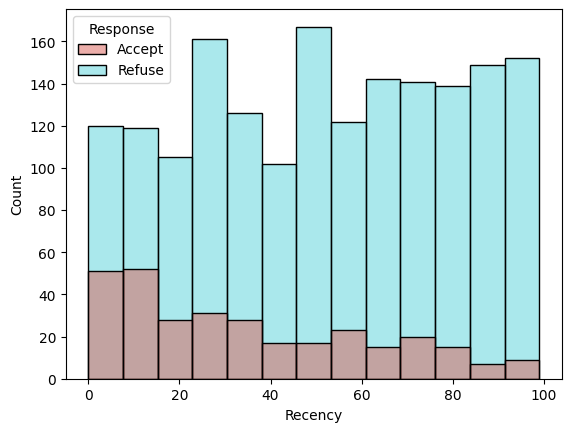

In [82]:
sns.histplot(x = 'Recency', hue = 'Response', palette = 'hls', data = data)


<Axes: xlabel='Income', ylabel='Count'>

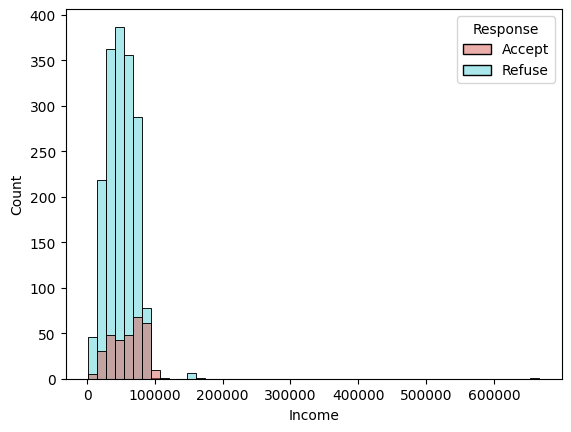

In [83]:
sns.histplot(x = 'Income', hue = 'Response', palette = 'hls',bins=50, data = data)


<Axes: xlabel='Customer_Age', ylabel='Count'>

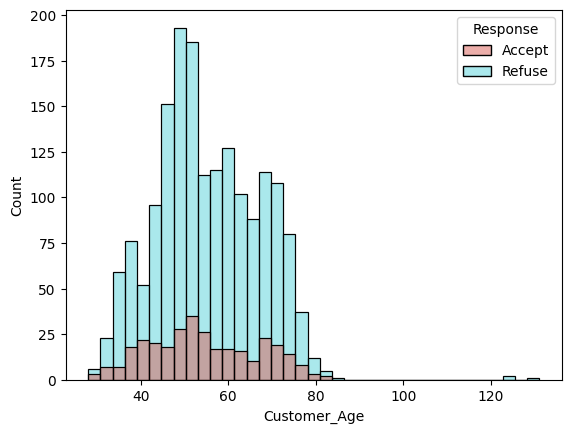

In [84]:
sns.histplot(x = 'Customer_Age', hue = 'Response', palette = 'hls', data = data)


Our data shows a clear bias towards "Refuse" responses compared to "Accept" responses across all features. This suggests a potential systemic preference for refusing requests. However, analyzing each response category ("Accept" and "Refuse") individually for each feature could reveal more granular insights. By examining them separately, we might identify features where "Accept" is more prominent or vice versa.

<ipython-input-85-3eeb2bd406f5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr() , annot = True)


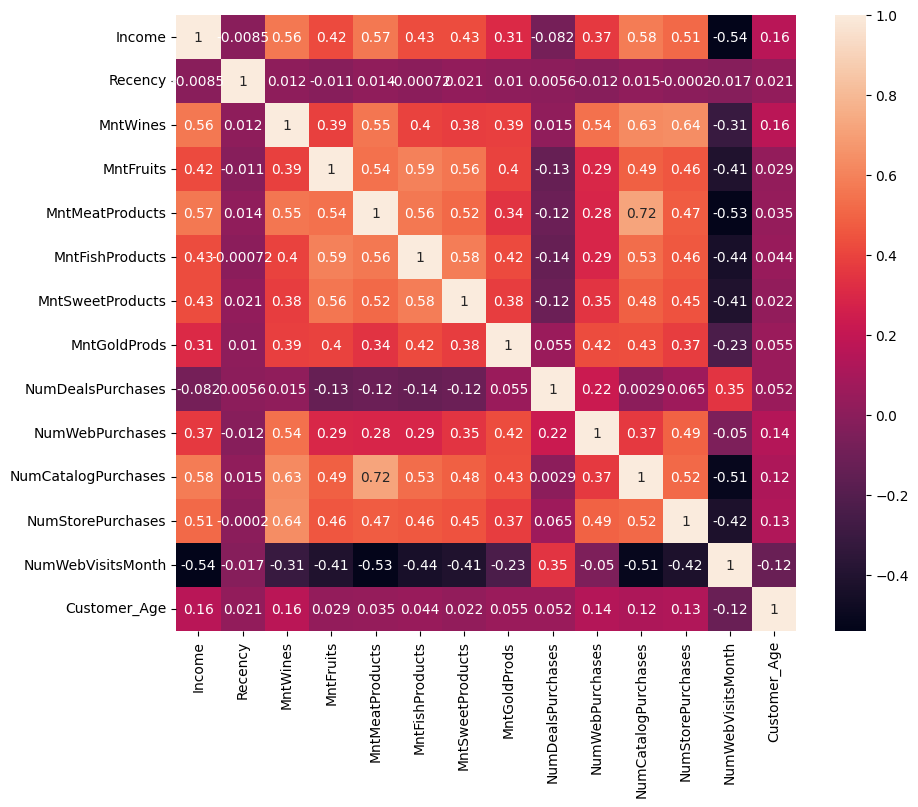

In [85]:
plt.figure(figsize = (10, 8))
sns.heatmap(data.corr() , annot = True)
plt.show()

In [103]:
data.to_csv('superstore_data.csv')
files.download('superstore_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>